# Monopoly math - space statistics

This notebook creates a `MonopolyBoard` object, and simulates a bunch of steps across the board. These are then visualized using matplotlib.

In [1]:
import numpy as np
import monopolymath as mm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Figure formatting
#plt.rc("text", usetex=True)
plt.rc("font", size=12, family="serif")

In [3]:
#Make a board object
mb = mm.MonopolyBoard()
print("Current position:\n\t",mb.position, mb.get_current_space())

Current position:
	 0 Go


In [4]:
#Assign the default dice: 2d6
mb.assign_dice()

In [5]:
mb.move_player() #via_roll is default True
print("Current position:\n\t",mb.position, mb.get_current_space())

Current position:
	 9 Connecticut Ave


In [6]:
#Move 1000 times
for _ in range(0, 1000): mb.move_player()

In [7]:
#Make a bar chart of the spaces visited
x = np.arange(mb.number_of_spaces) #A dummy variable for the bar plot

Text(0,0.5,'Landing likelihood [%]')

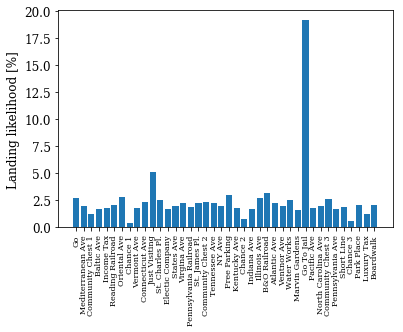

In [8]:
#Make a bar chart of the spaces visited
plt.bar(x, 100*mb.space_visits/np.sum(mb.space_visits))
_ = plt.xticks(x, mb.space_names, fontsize=8, rotation='vertical')
plt.ylabel("Landing likelihood [%]")

In [9]:
#Move 1 million times
for _ in range(0, 1000000): mb.move_player()

Text(0,0.5,'Landing likelihood [%]')

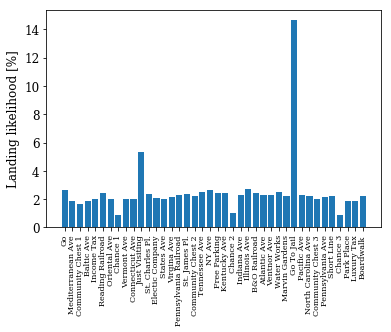

In [10]:
plt.bar(x, 100*mb.space_visits/np.sum(mb.space_visits))
_ = plt.xticks(x, mb.space_names, fontsize=8, rotation='vertical')
plt.ylabel("Landing likelihood [%]")

## Properties only

The plot above is interesting, since it shows that around 14% of the game is spent in jail (fun...), almost 6% of the game in "just visiting", and not a whole lot of time sitting on
chance squares. What we really want to know though, are the stats of just the properties.

In [11]:
#Indices for just the property spaces
inds = [space.kind == "Property" for space in mb.spaces]
prop_names = []
for space in mb.spaces:
    if space.kind == "Property":
        prop_names.append(space.name)
property_space_visits = np.array(mb.space_visits[inds])
x_properties = np.arange(len(property_space_visits))

(3, 6)

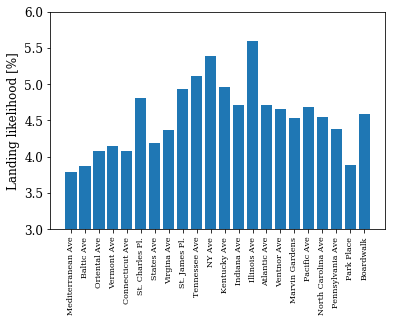

In [12]:
plt.bar(x_properties, 100*property_space_visits/np.sum(property_space_visits))
_ = plt.xticks(x_properties, prop_names, fontsize=8, rotation='vertical')
plt.ylabel("Landing likelihood [%]")
plt.ylim(3, 6)

(3, 6)

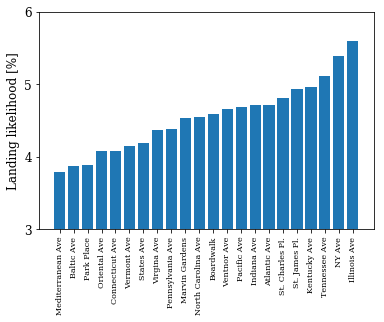

In [13]:
#Now order by likelihood
order = np.argsort(property_space_visits)
ordered_property_space_visits = np.array([property_space_visits[i] for i in order])
ordered_prop_names = [prop_names[i] for i in order]
plt.bar(x_properties, 100*ordered_property_space_visits/np.sum(ordered_property_space_visits))
_ = plt.xticks(x_properties, ordered_prop_names, fontsize=8, rotation='vertical')
plt.ylabel("Landing likelihood [%]")
plt.yticks([3,4,5,6])
plt.ylim(3, 6)

# Rent weighted value

The value of a space is actually going to be the rent times the likelihood it gets landed on.

[ 2.  4.  6.  6.  8. 10. 10. 12. 14. 14. 16. 18. 18. 20. 22. 22. 24. 26.
 26. 28. 35. 50.]
30.283316129733254


Text(0,0.5,'Value [Rel. to BW]')

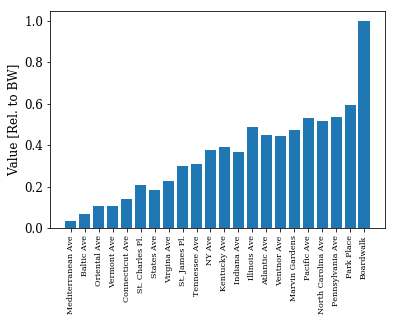

In [14]:
rents = []
for space in mb.spaces:
    if space.kind == "Property":
        rents.append(space.rent)
rents = np.array(rents)
print(rents)
value = property_space_visits * rents
print(value[-1]/value[0])
plt.bar(x_properties, value/np.max(value))
_ = plt.xticks(x_properties, prop_names, fontsize=8, rotation='vertical')
plt.ylabel("Value [Rel. to BW]")

[ 250.  450.  550.  550.  600.  750.  750.  900.  950.  950. 1000. 1050.
 1050. 1100. 1150. 1150. 1200. 1275. 1275. 1400. 1500. 2000.]
9.69066116151464


Text(0,0.5,'Hotel Value [Rel. to BW]')

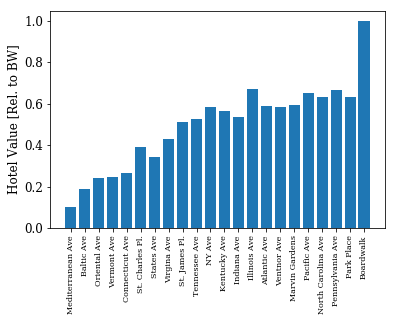

In [15]:
rents = []
for space in mb.spaces:
    if space.kind == "Property":
        rents.append(space.building_rents[4])
rents = np.array(rents)
print(rents)
value = property_space_visits * rents
print(value[-1]/value[0])
plt.bar(x_properties, value/np.max(value))
_ = plt.xticks(x_properties, prop_names, fontsize=8, rotation='vertical')
plt.ylabel("Hotel Value [Rel. to BW]")

## Statistics by property groups

Basically, the only interesting decisions to be made in Monopoly are which properties to trade. For this reason, it is actually more helpful to look at the value of property _group_ rather than individual properties. In the next few cells, we will look at the landing statistics of property groups. Since some readers might be colorblind, groups will be referenced by the dominant property rather than their color. So the 'dark purple' group will be the 'Baltic group', and the 'dark blue' group will be the 'Boardwalk group'.

In [16]:
group_names = ["Baltic","Connecticut","Virginia","New York","Illinois",
               "Marvin Gardens","Pennsylvania","Boardwalk"]
group_rents = np.zeros(8)
group_visits = np.zeros(8)
for i, space in enumerate(mb.spaces):
    if space.kind == "Property":
        group_rents[space.group] += space.rent
        group_visits[space.group] += mb.space_visits[i]
group_values = group_rents * group_visits

Text(0,0.5,'Group Rent Value [Rel. to BW]')

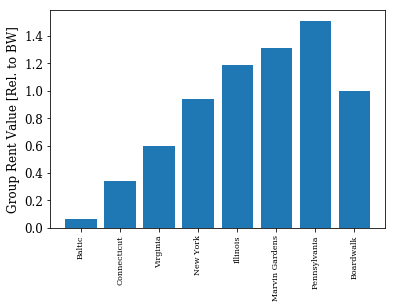

In [17]:
x = np.arange(len(group_names))
plt.bar(x, group_values/np.max(group_values[-1]))
_ = plt.xticks(x, group_names, fontsize=8, rotation='vertical')
plt.ylabel("Group Rent Value [Rel. to BW]")

Text(0,0.5,'Group Hotel Value [Rel. to BW]')

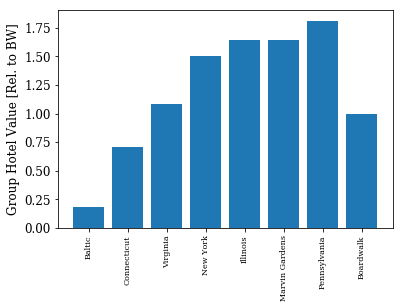

In [18]:
group_rents = np.zeros(8)
group_visits = np.zeros(8)
for i, space in enumerate(mb.spaces):
    if space.kind == "Property":
        group_rents[space.group] += space.building_rents[-1]
        group_visits[space.group] += mb.space_visits[i]
group_values = group_rents * group_visits
plt.bar(x, group_values/np.max(group_values[-1]))
_ = plt.xticks(x, group_names, fontsize=8, rotation='vertical')
plt.ylabel("Group Hotel Value [Rel. to BW]")

Text(0,0.5,'Group 1-House Value [Rel. to BW]')

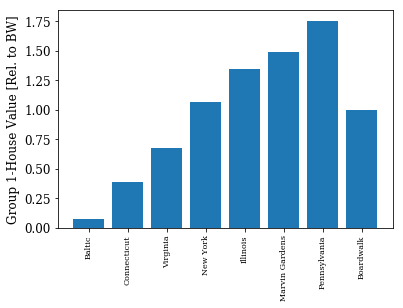

In [19]:
group_rents = np.zeros(8)
group_visits = np.zeros(8)
for i, space in enumerate(mb.spaces):
    if space.kind == "Property":
        group_rents[space.group] += space.building_rents[0]
        group_visits[space.group] += mb.space_visits[i]
group_values = group_rents * group_visits
plt.bar(x, group_values/np.max(group_values[-1]))
_ = plt.xticks(x, group_names, fontsize=8, rotation='vertical')
plt.ylabel("Group 1-House Value [Rel. to BW]")

## Results

We see some interesting results! Namely, once properties are grouped together, it is clear that the Boardwalk group is not the most valuable, which is not unexpected. In fact, the Pennsylvania (green) group is the best, which is somewhat surprising, since the common Monopoly philosophy is that the properties between Just Visiting and Go To Jail are the best since they are visited more often. Clearly, the earning power of the properties tips the scales, and more than balances out the fact that the green group is visited less.

Also, we see that in the endgame, when everyone can afford hotels, the New York, Illinois, Marvin Gardens, and Pennsylvania groups are all roughly equal in value.